<a href="https://colab.research.google.com/github/SakPy04/BitsOfGood/blob/main/mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


roadSize = 300
maxVelocity = 5
d = 0.1


road = np.full(roadSize, -1)  # -1 is an empty cell

cars = int(d * roadSize)
carPos = np.random.choice(range(roadSize), size=cars, replace=False)
for pos in carPos:
    road[pos] = np.random.randint(0, maxVelocity + 1)

def simulate(road, maxVelocity, roadSize):
    newRoad = np.full(roadSize, -1, dtype=int)

    for i, speed in enumerate(road):
        if speed != -1:
            if speed < maxVelocity:
                speed += 1


            for d in range(1, speed + 1):
                nextPos = (i + d) % roadSize
                if road[nextPos] != -1:
                    speed = d - 1
                    break
            newPos = (i + speed) % roadSize

            if newRoad[newPos] == -1:
                newRoad[newPos] = speed

    return newRoad


time = 100
for time in range(time):
    rtime= simulate(road, maxVelocity, roadSize)


# At this p

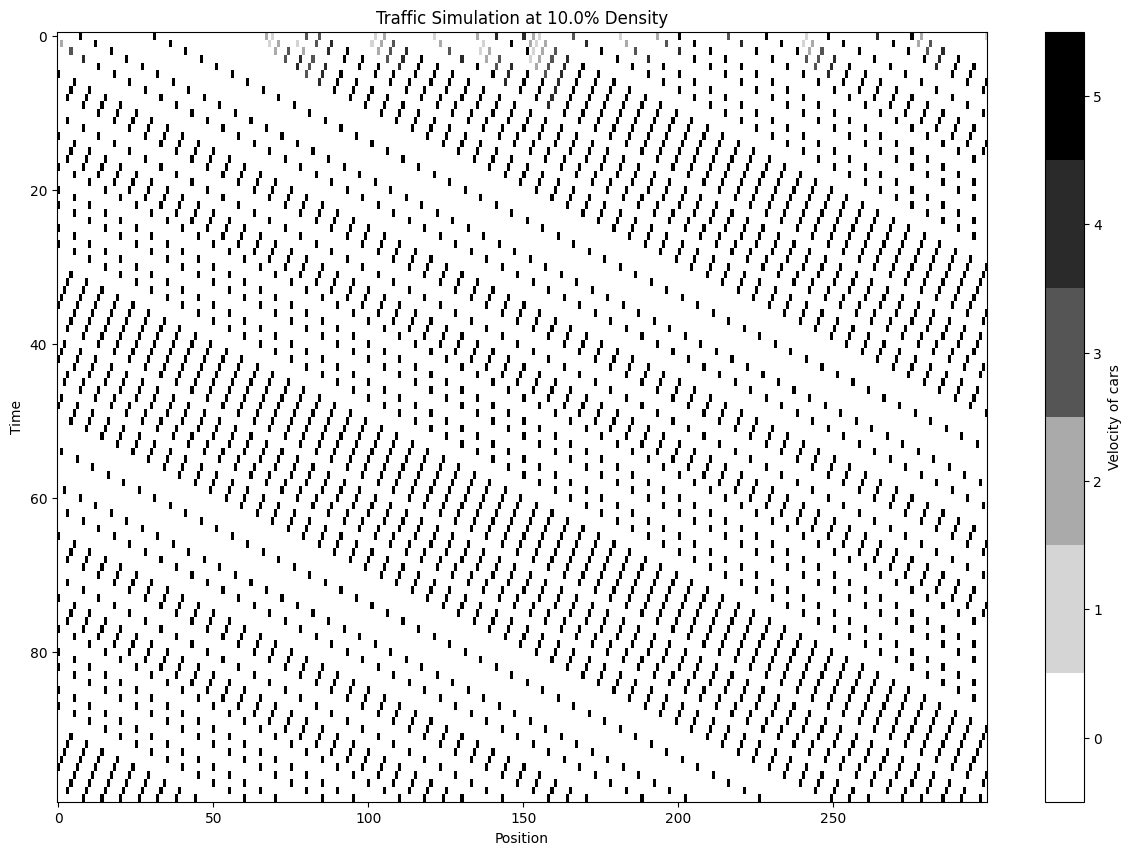

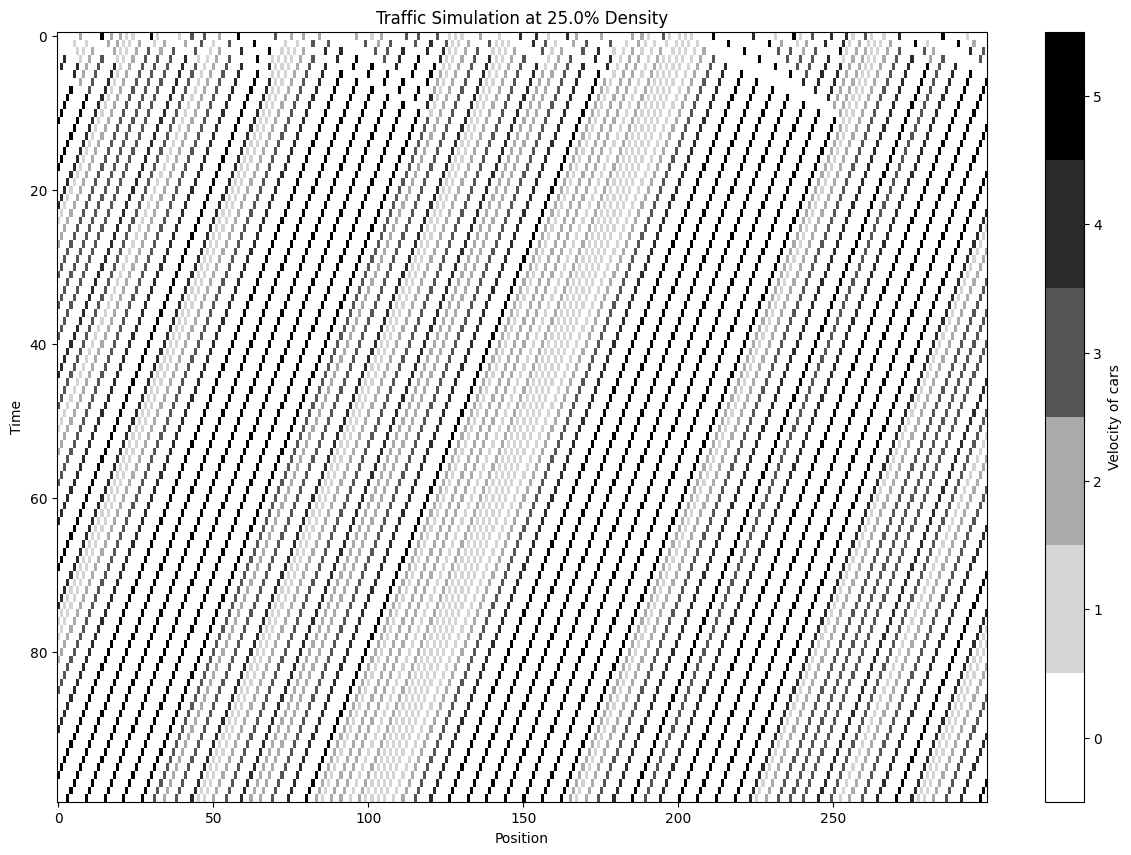

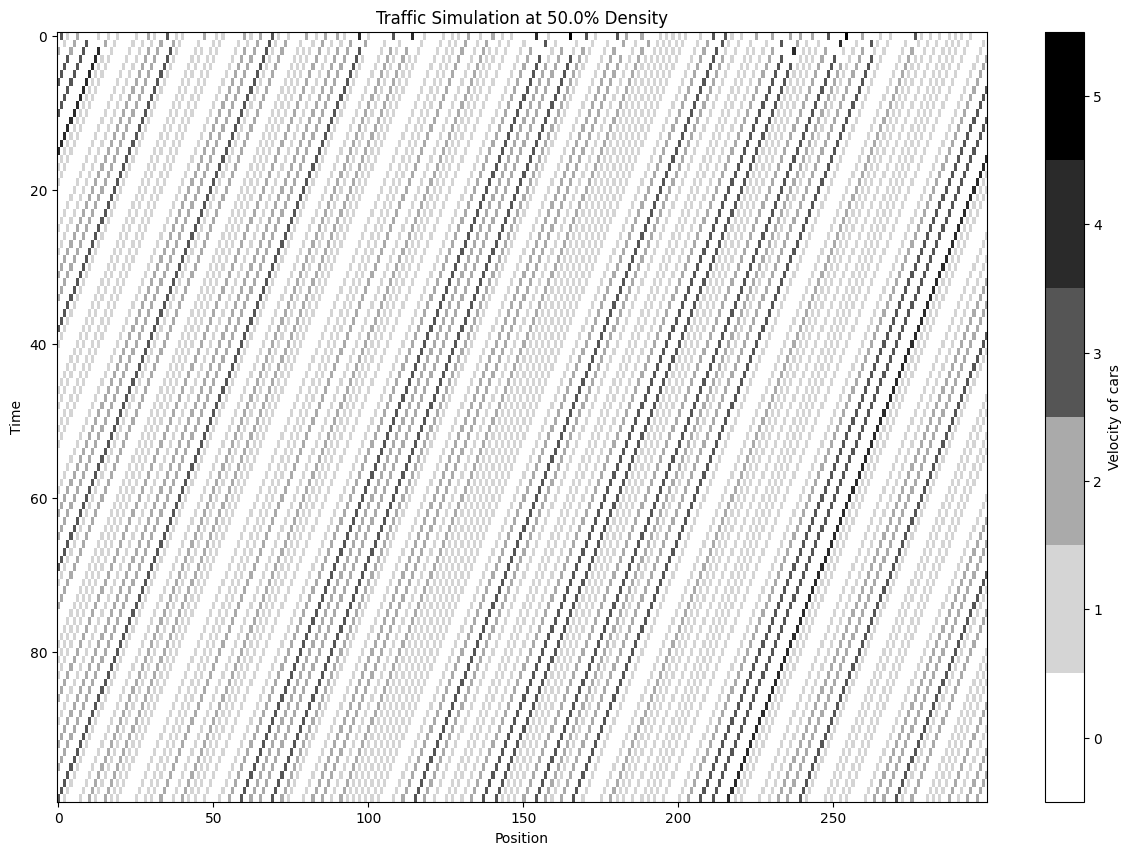

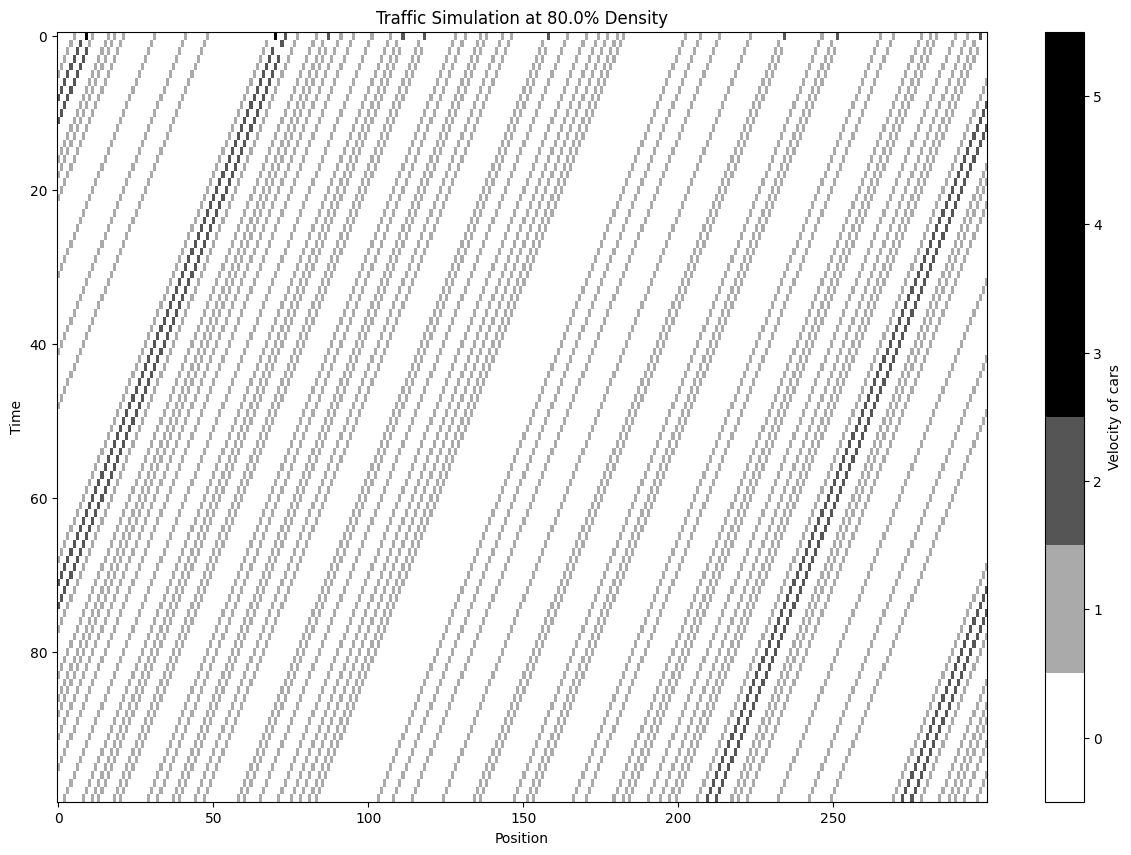

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def runSimulation(roadSize, maxVelocity, density, time):

    road = np.full(roadSize, -1, dtype=int)  # -1 indicates an empty cell


    cars = int(density * roadSize)
    carPos = np.random.choice(range(roadSize), size=cars, replace=False)
    for pos in carPos:
        road[pos] = np.random.randint(0, maxVelocity + 1)

    snapshots = []
    for i in range(time):
        road = simulate(road, maxVelocity, roadSize)
        snapshots.append(road.copy())

    return snapshots

def plotSnapshots(snapshots, title):
    data = np.array(snapshots)

    cmap = LinearSegmentedColormap.from_list(
        "custom_gray", [(1, 1, 1), (0, 0, 0)], N = maxVelocity + 2)

    normData = np.where(data == -1, np.nan, data)  # Convert -1 to np.nan for visualization

    plt.figure(figsize=(15, 10))
    plt.imshow(normData, cmap = cmap, aspect='auto', interpolation='none')
    plt.colorbar(label='Velocity of cars', ticks = range(maxVelocity + 1), boundaries = np.arange(-0.5, maxVelocity+1.5, 1))
    plt.xlabel('Position')
    plt.ylabel('Time')
    plt.title(title)
    plt.show()

# Parameters for the simulation
roadSize = 300
maxVelocity = 5
time = 100
densities = [0.1, 0.25, 0.5, 0.8]

# Run the simulation and plot the results for different densities
for density in densities:
    snapshots = runSimulation(roadSize, maxVelocity, density, time)
    plotSnapshots(snapshots, f'Traffic Simulation at {density*100}% Density')


In [ ]:

def simulateDally(road, maxVelocity, roadSize, p_dally):

    newRoad = np.full(roadSize, -1, dtype=int)

    for i, speed in enumerate(road):
        if speed != -1:
            if speed < maxVelocity:
                speed += 1

            if np.random.random() < p_dally and speed > 0:
                speed -= 1

            for d in range(1, speed + 1):
                nextPos = (i + d) % roadSize
                if road[nextPos] != -1:
                    speed = d - 1
                    break
            newPos = (i + speed) % roadSize
            if newRoad[newPos] == -1:
                newRoad[newPos] = speed

    return newRoad


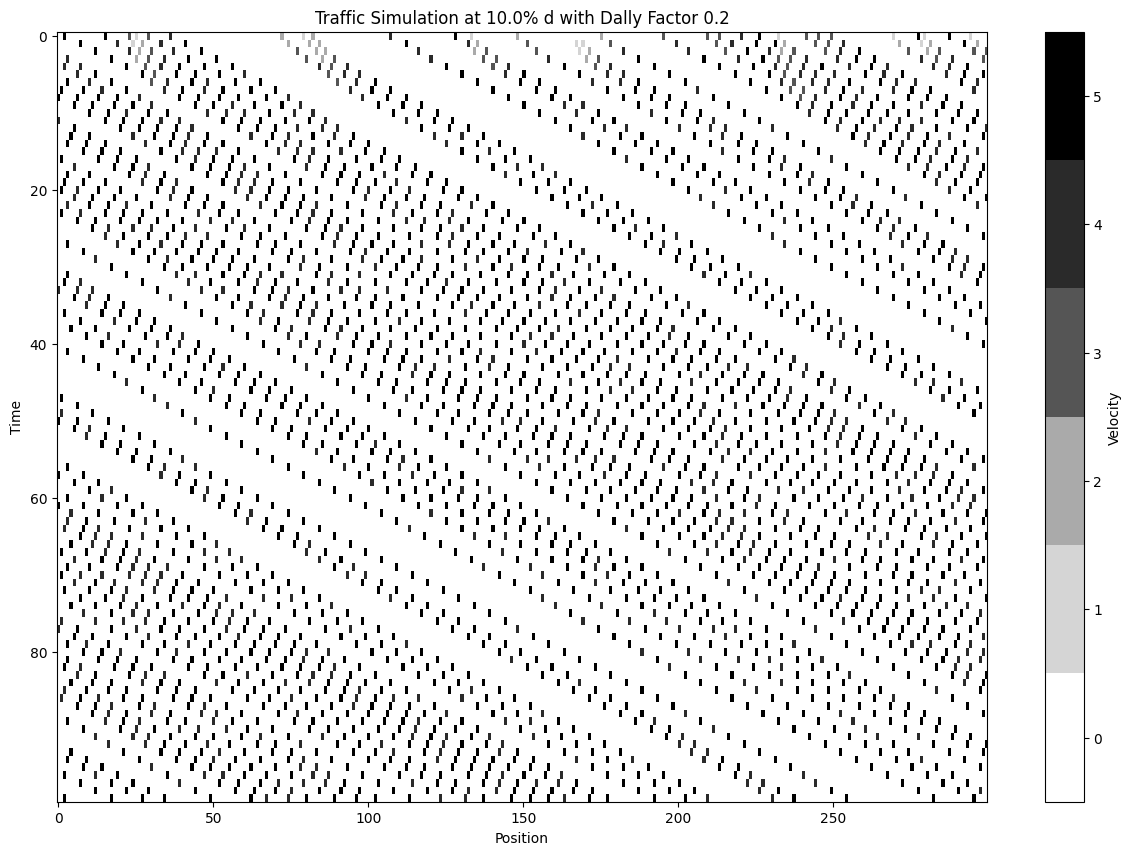

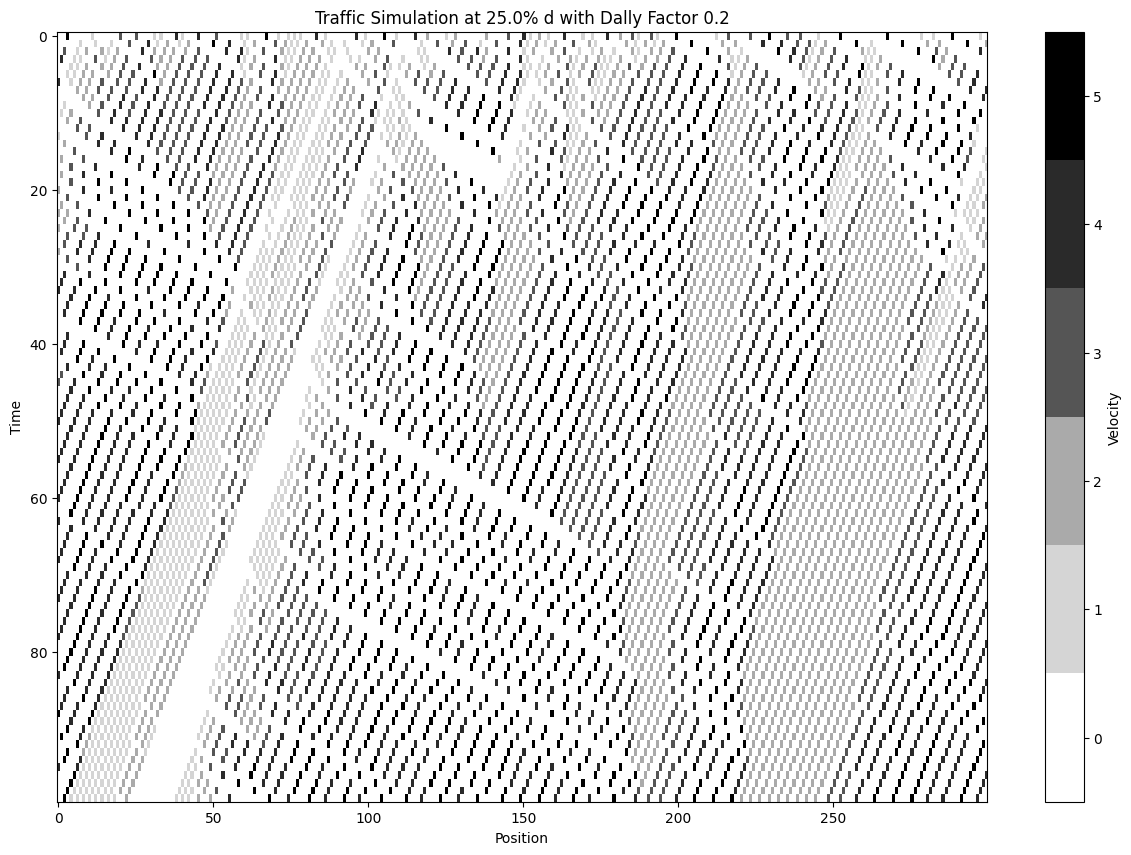

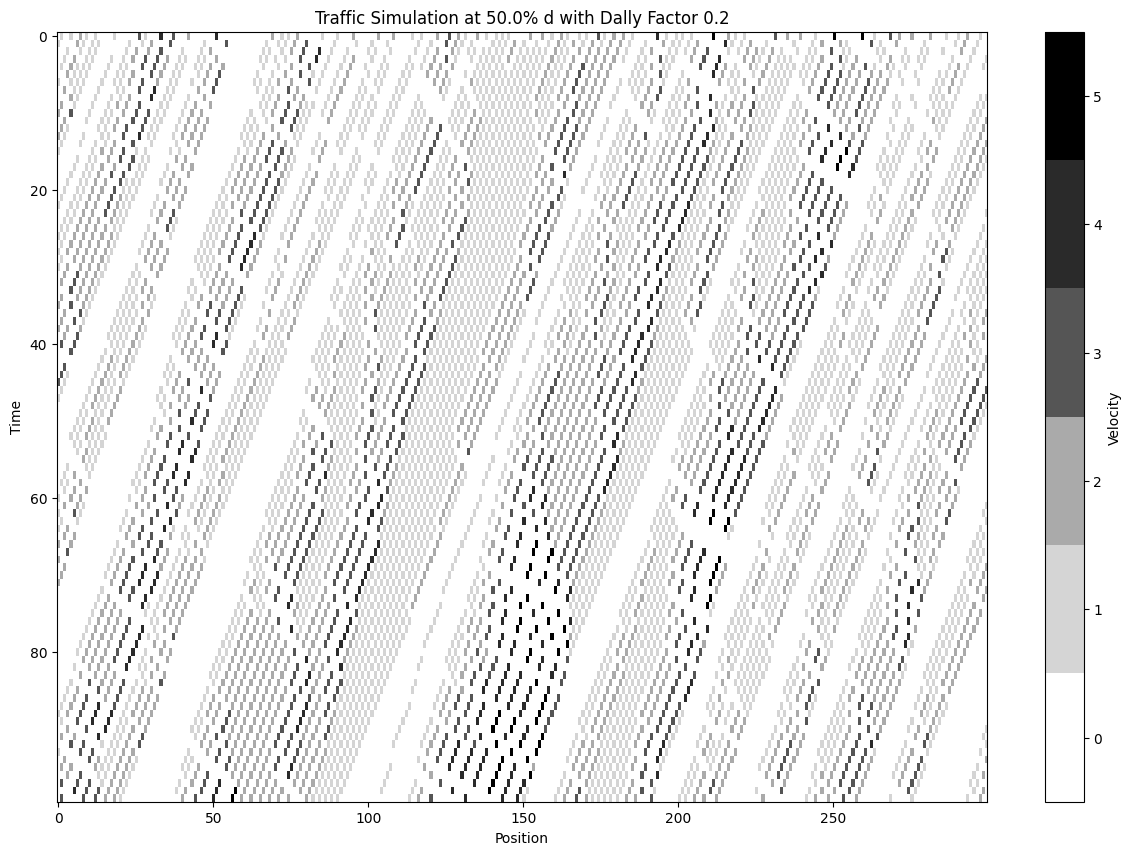

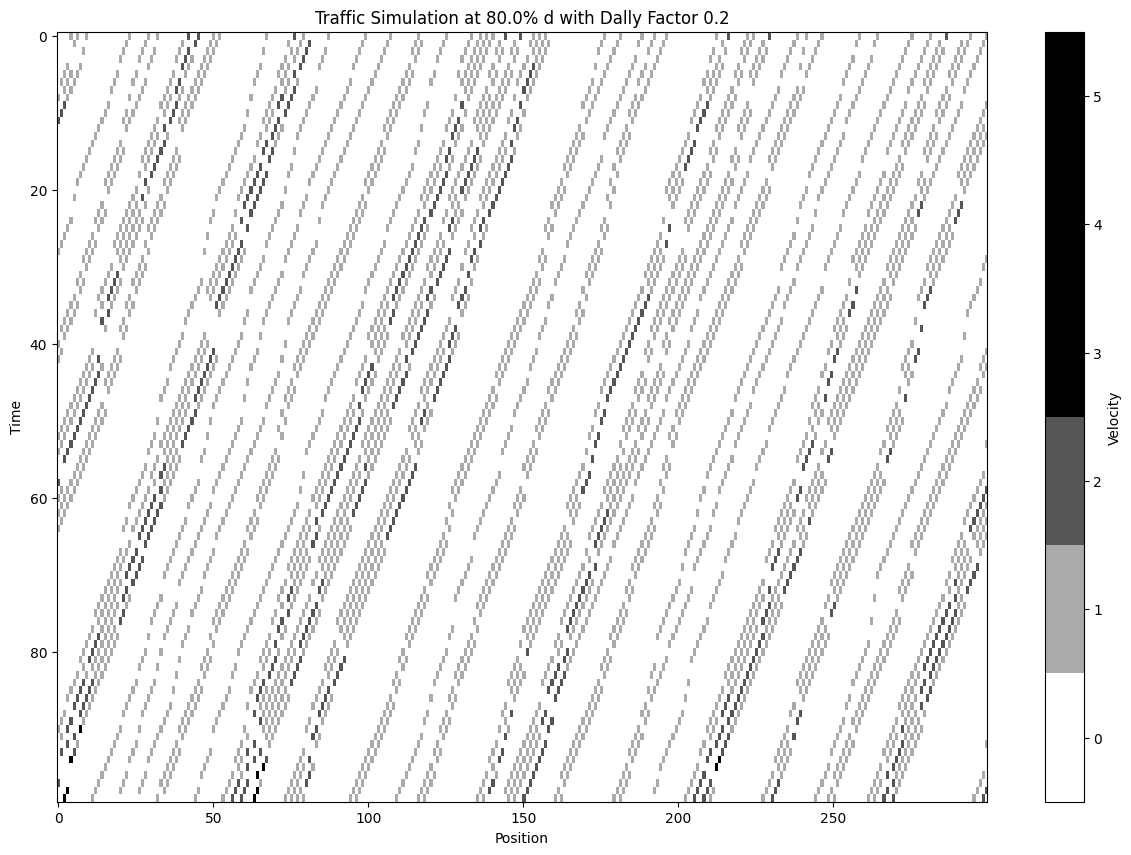

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np


def runSimulation(roadSize, maxVelocity, d, time, p_dally):
    road = np.full(roadSize, -1, dtype=int)


    numCars = int(d * roadSize)
    carPos = np.random.choice(roadSize, size = numCars, replace=False)
    for pos in carPos:
        road[pos] = np.random.randint(0, maxVelocity + 1)

    snapshots = []
    for i in range(time):
        road = simulateDally(road, maxVelocity, roadSize, p_dally)
        snapshots.append(road.copy())

    return snapshots

def plotSnapshots(snapshots, title):
    data = np.array(snapshots)
    cmap = LinearSegmentedColormap.from_list("custom_gray", [(1, 1, 1), (0, 0, 0)], N=maxVelocity+2)
    norm_data = np.where(data == -1, np.nan, data)
    plt.figure(figsize=(15, 10))
    plt.imshow(norm_data, cmap=cmap, aspect='auto', interpolation='none')
    plt.colorbar(label='Velocity', ticks=range(maxVelocity+1), boundaries=np.arange(-0.5, maxVelocity+1.5, 1))
    plt.xlabel('Position')
    plt.ylabel('Time')
    plt.title(title)
    plt.show()

roadSize = 300
maxVelocity = 5
time = 100
p_dally = 0.2  # Dally factor

densities = [0.1, 0.25, 0.5, 0.8]


for d in densities:
    snapshots = runSimulation(roadSize, maxVelocity, d, time, p_dally)
    plotSnapshots(snapshots, f'Traffic Simulation at {d*100}% d with Dally Factor {p_dally}')


In [ ]:
def changeLane(srcLane, tgtLane, position, maxVelocity, safety):

    for i in range(1, safety + 1):
        if tgtLane[(position - i) % roadSize] != -1:
            return False


    for i in range(1, maxVelocity + 1):
        if tgtLane[(position + i) % roadSize] != -1:
            return False  # Not enough space ahead

    return True
def simulate_two_lanes(lane1, lane2, maxVelocity, roadSize, p_dally, safety):

    newLane1 = np.full(roadSize, -1, dtype=int)
    newLane2 = np.full(roadSize, -1, dtype=int)

    for lane, newLane in [(lane1, newLane1), (lane2, newLane2)]:
        for position, speed in enumerate(lane):
            if speed == -1:
                continue

            if speed < maxVelocity:
                speed += 1


            if np.random.random() < p_dally and speed > 0:
                speed -= 1

            if lane is lane1:
              otherLane = lane2
              newOther = newLane2
            else:
                otherLane = lane1
                newOther = newLane1


            if changeLane(lane, otherLane, position, maxVelocity, safety):

                if (lane[(position + speed) % roadSize] != -1 and
                        lane[(position + speed) % roadSize] < speed):
                    newOther[position] = speed
                    continue

            for d in range(1, speed):
                if lane[(position + d) % roadSize] != -1:
                    speed = d - 1
                    break

            newPos = (position + speed) % roadSize
            newLane[newPos] = speed

    return newLane1, newLane2


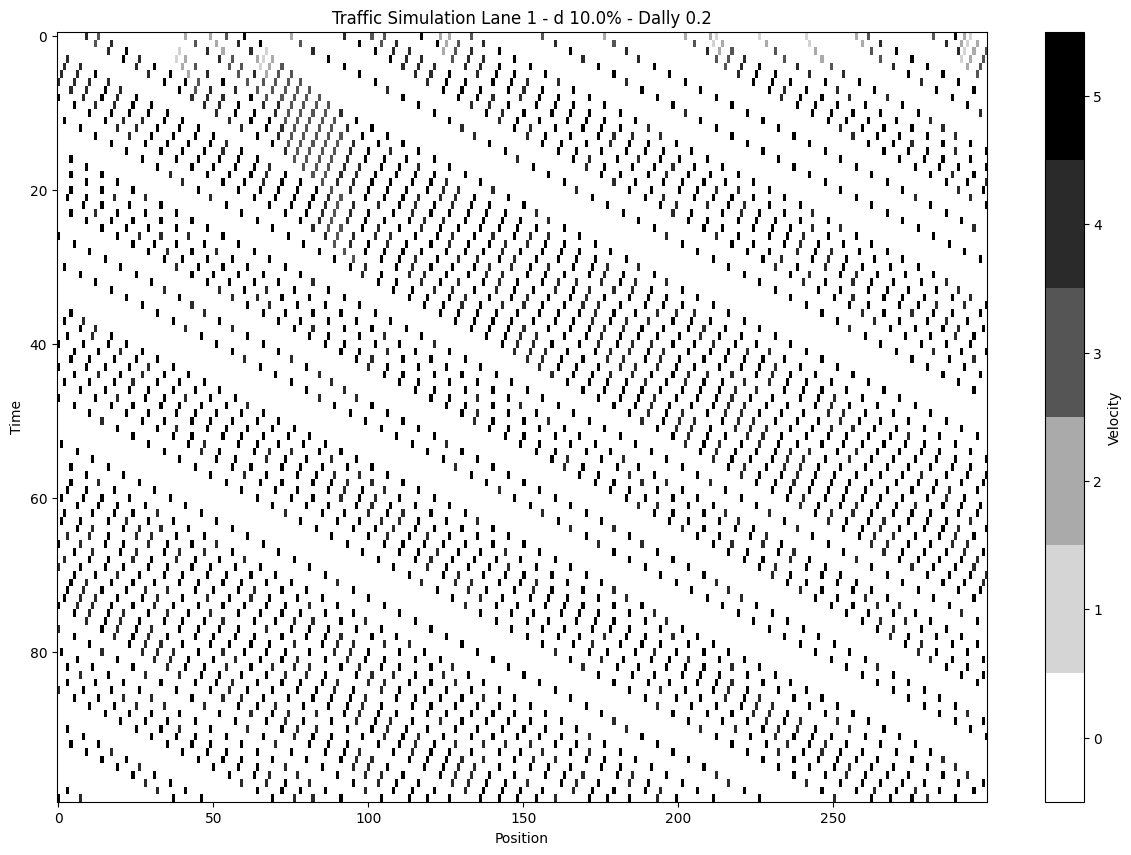

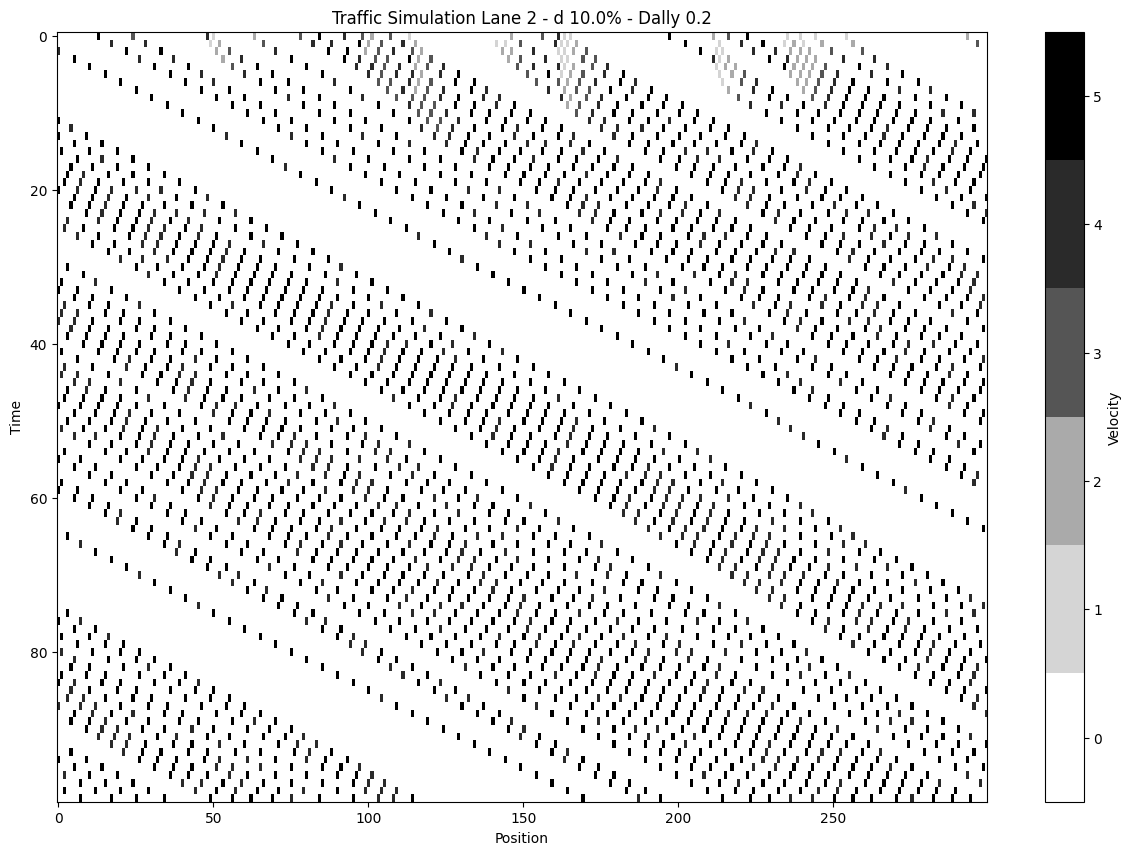

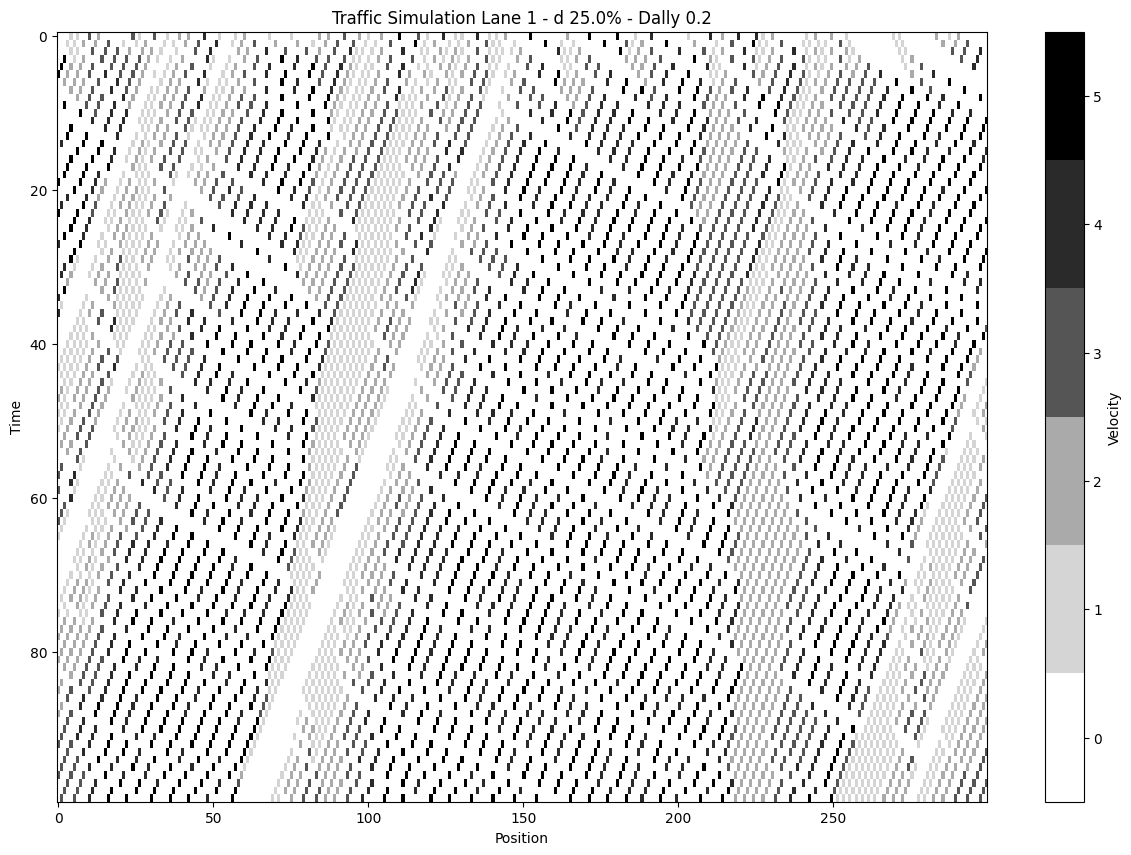

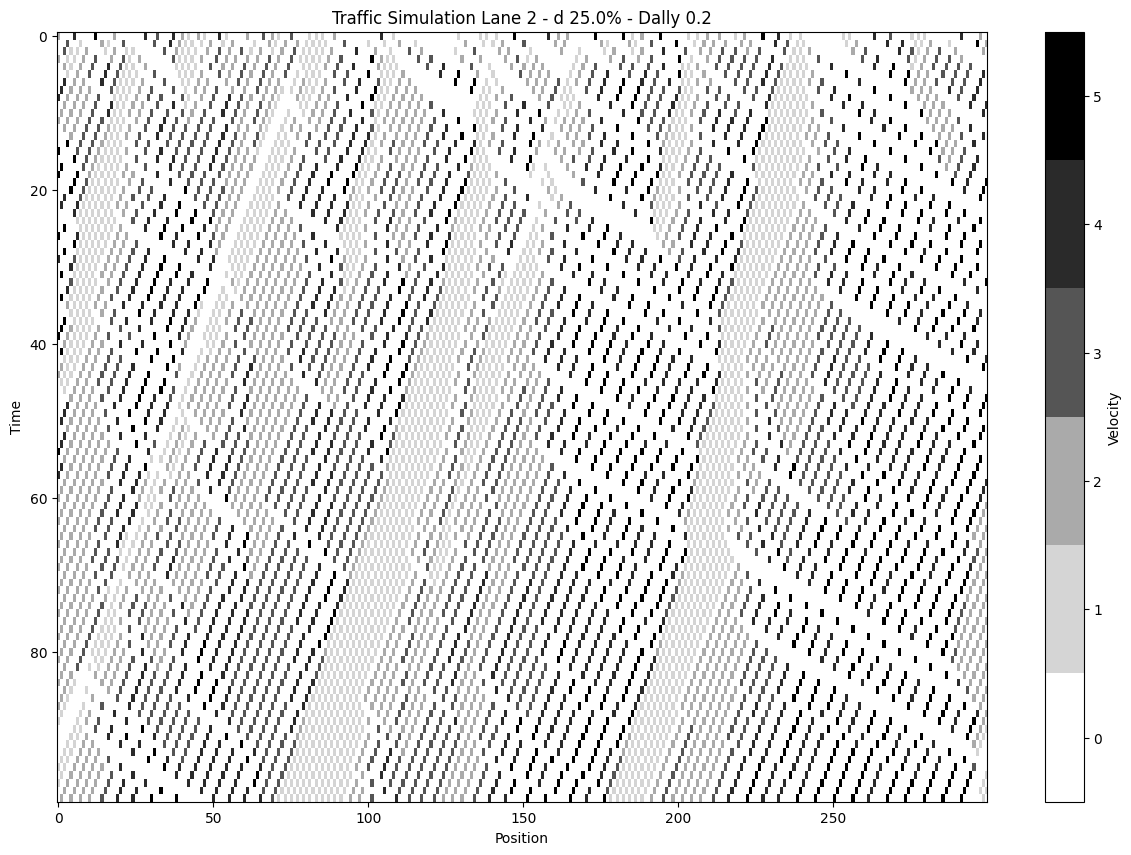

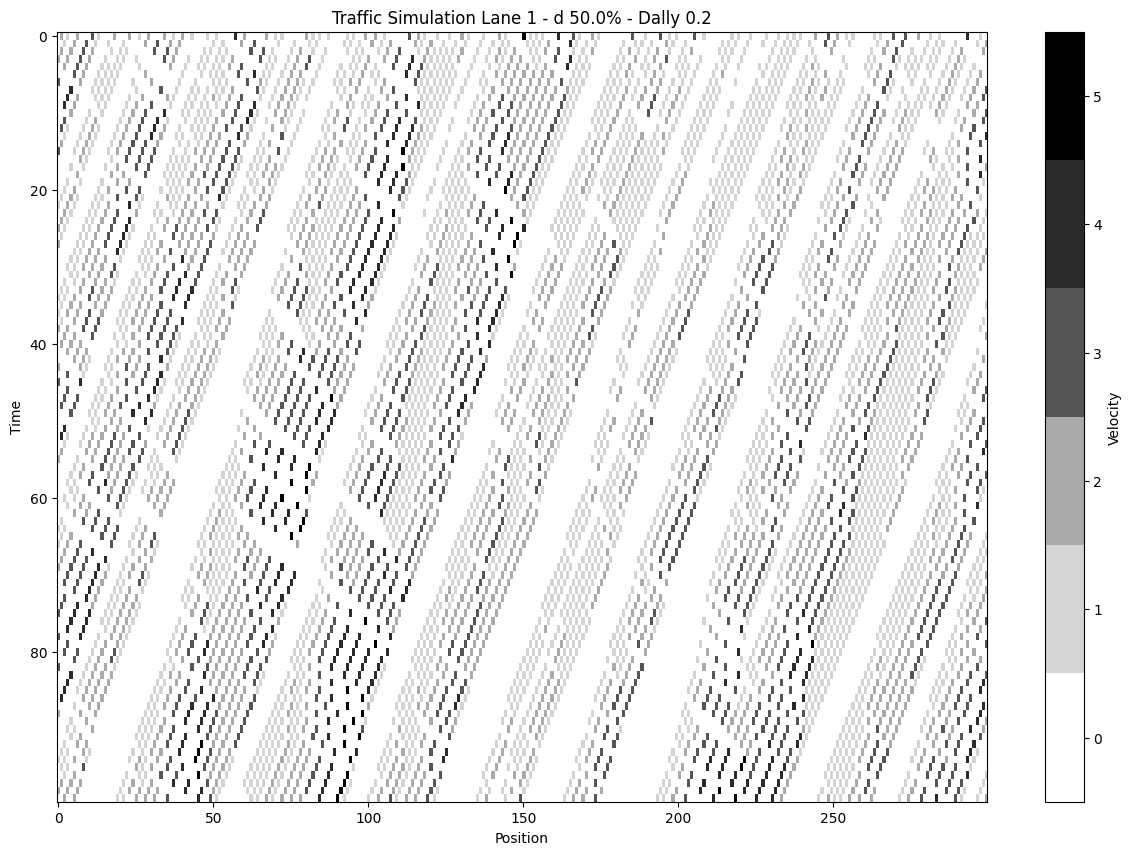

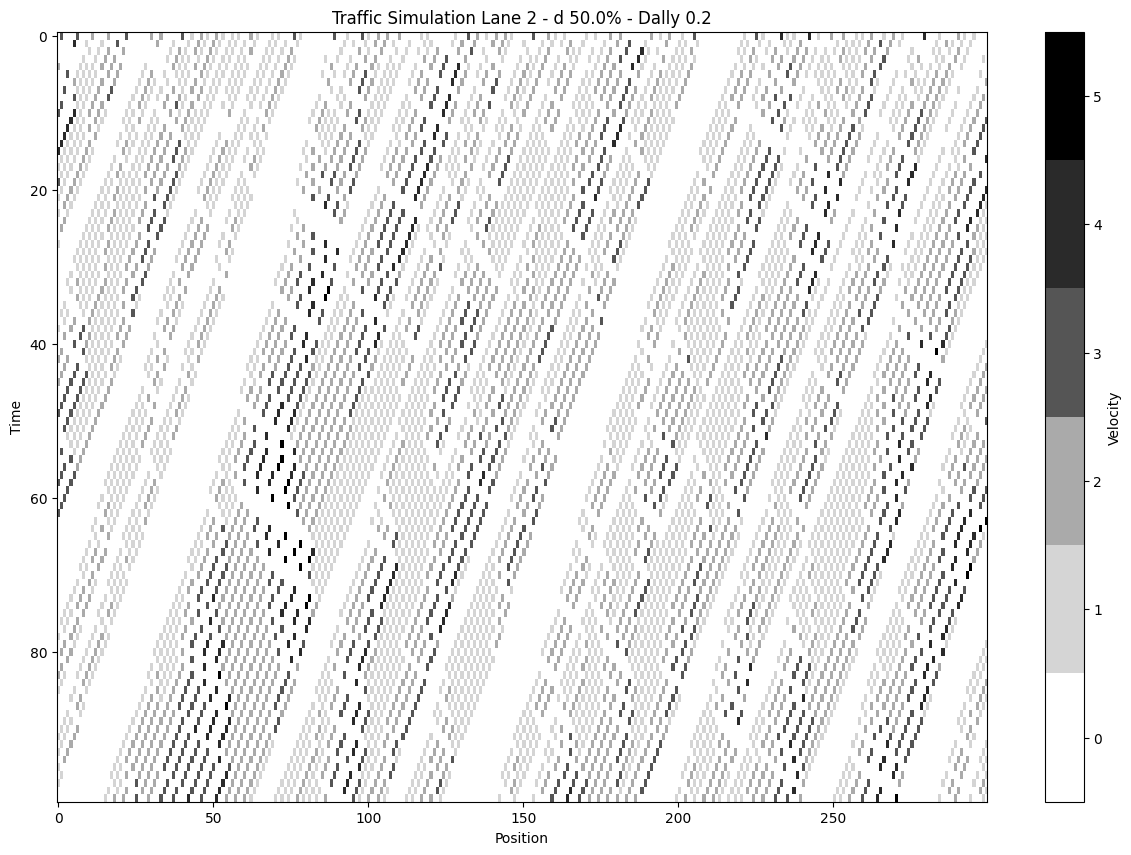

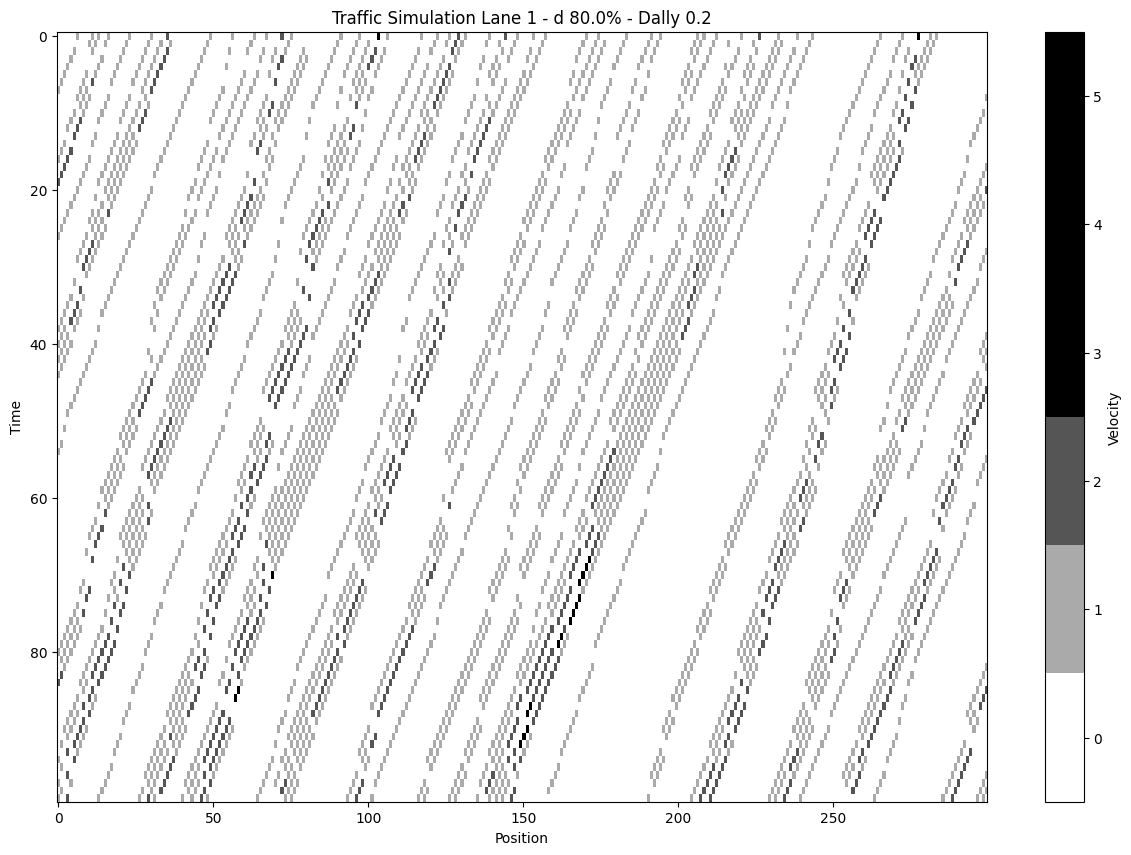

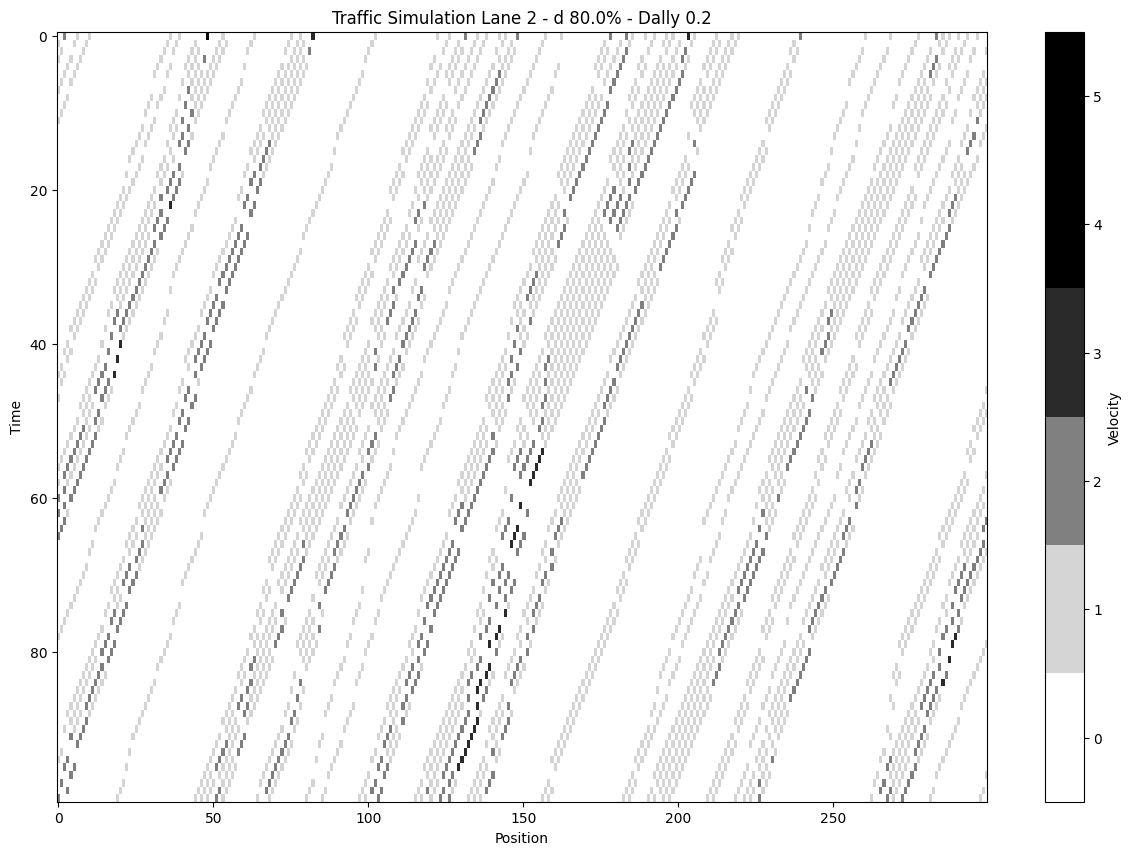

In [ ]:

def populateLanes(roadSize, d, maxVelocity):
    lane = np.full(roadSize, -1, dtype=int)
    cars = int(d * roadSize)
    carPos = np.random.choice(range(roadSize), size=cars, replace=False)
    for pos in carPos:
        lane[pos] = np.random.randint(0, maxVelocity + 1)
    return lane

roadSize = 300
maxVelocity = 5
time = 100
p_dally = 0.2
safety = 4


for d in densities:
    lane1 = populateLanes(roadSize, d, maxVelocity)
    lane2 = populateLanes(roadSize, d, maxVelocity)

    snapshots_lane1 = runSimulation(roadSize, maxVelocity, d, time, p_dally)
    snapshots_lane2 = runSimulation(roadSize, maxVelocity, d, time, p_dally)


    plotSnapshots(snapshots_lane1, f'Traffic Simulation Lane 1 - d {d*100}% - Dally {p_dally}')


    plotSnapshots(snapshots_lane2, f'Traffic Simulation Lane 2 - d {d*100}% - Dally {p_dally}')
